## **TP FINAL - Gustavo Uñapillco**

#### **MongoDB**

Las consultas de agregación fueron ejecutadas desde el Shell de MongoDB, y las capturas adjuntas corresponden a los resultados obtenidos. 

Cabe destacar que no se visualizan todos los documentos, sino únicamente aquellos que la plataforma muestra en su respuesta inicial.

#### **1. Número de películas lanzadas cada año**



``` javascript -- 
db.movies.aggregate([
  {
    $group: {
      _id: { $year: "$released" },
      totalPeliculas: { $sum: 1 }
    }
  },
  { $sort: { _id: -1 } }   // Orden descendente
]).toArray();
```

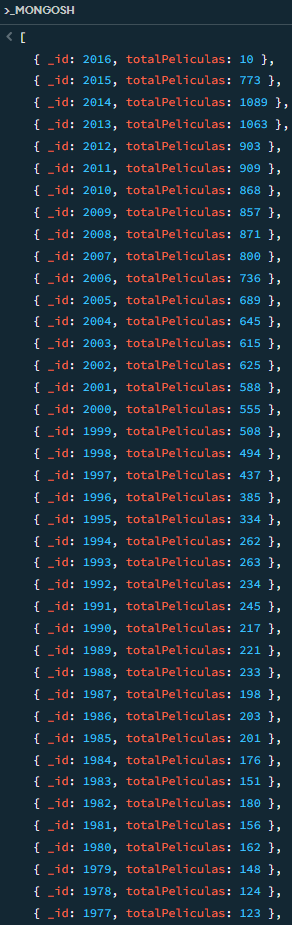

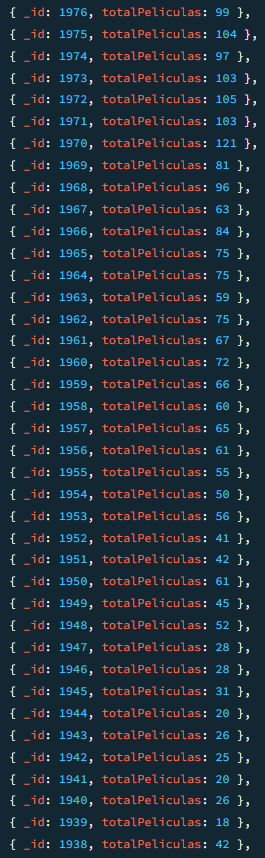

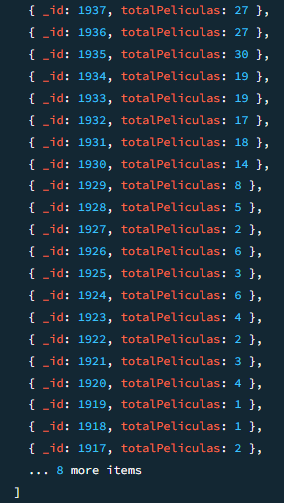

#### **2. Calificación promedio de IMDb por género**



``` javascript -- 
db.movies.aggregate([
  { $unwind: "$genres" },
  {
    $group: {
      _id: "$genres",
      promedioIMDB: { $avg: "$imdb.rating" }
    }
  },
  { $sort: { promedioIMDB: -1 } }
]).toArray();
```

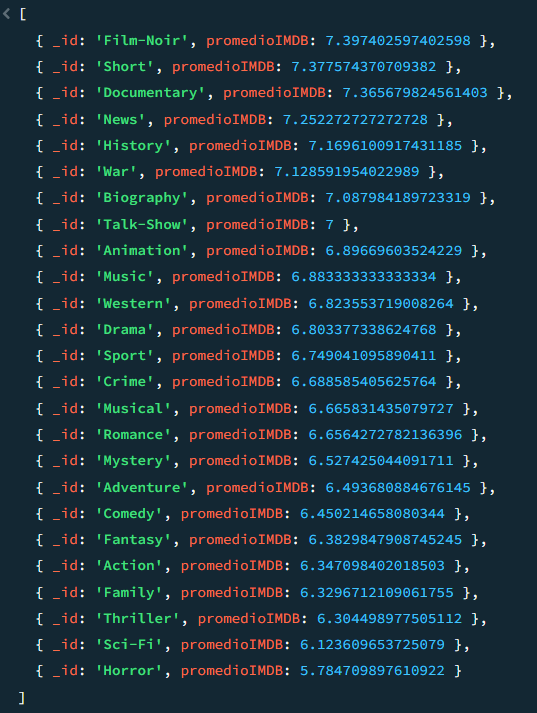

#### **3. Top 5 películas con más alta calificación en IMDb**


``` javascript -- 
db.movies.find(
  { "imdb.rating": { $ne: null } },
  { title: 1, "imdb.rating": 1 }
).sort({ "imdb.rating": -1 }).limit(5);
```

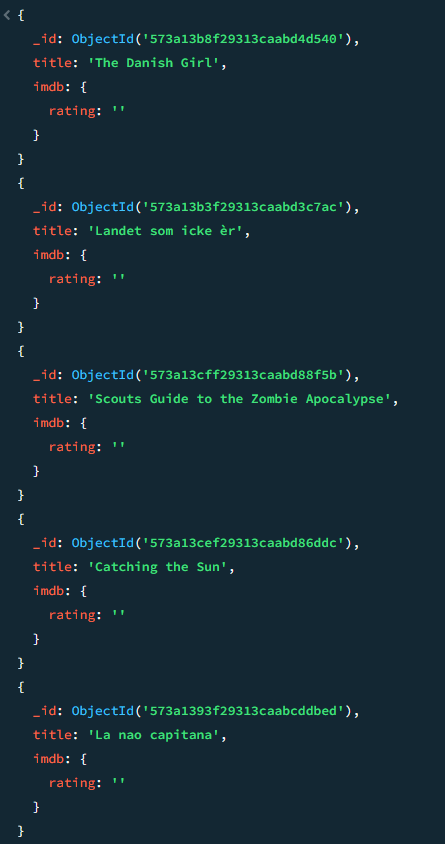

#### **4. Número total de películas y duración promedio por director**


``` javascript -- 
  db.movies.aggregate([
    { $unwind: "$directors" },
    {
      $group: {
        _id: "$directors",
        totalPeliculas: { $sum: 1 },
        duracionPromedio: { $avg: "$runtime" }
      }
    },
    { $sort: { totalPeliculas: -1 } }
  ]).toArray();
```

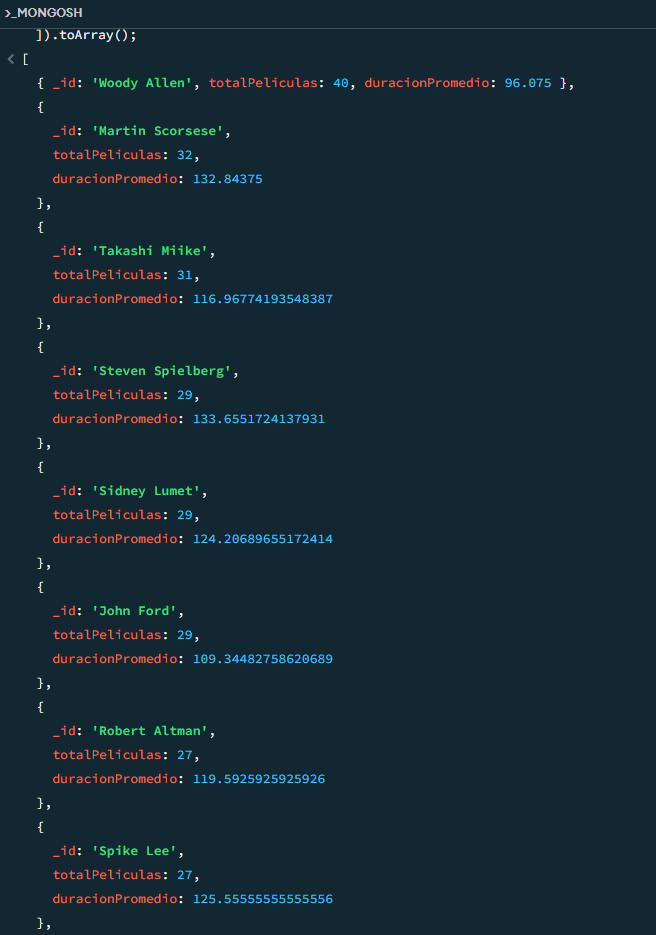
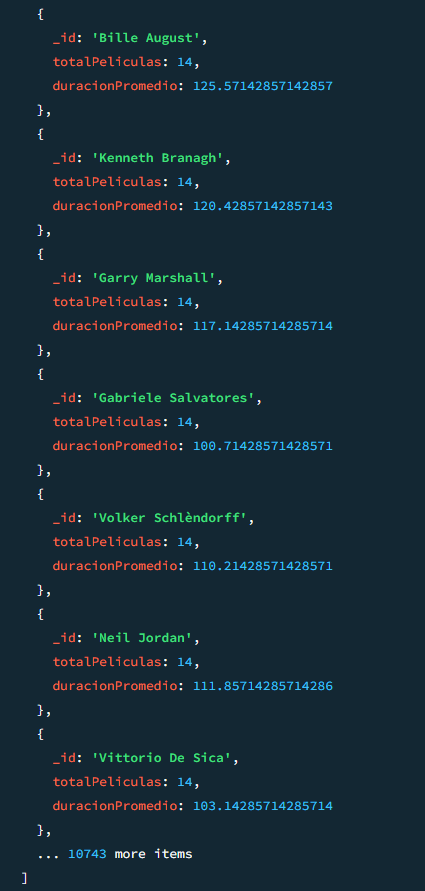

#### **5. Distribución de películas por clasificación MPAA** 


``` javascript -- 
db.movies.aggregate([
  {
    $group: {
      _id: "$rated",
      cantidad: { $sum: 1 }
    }
  },
  { $sort: { cantidad: -1 } }
]);
```

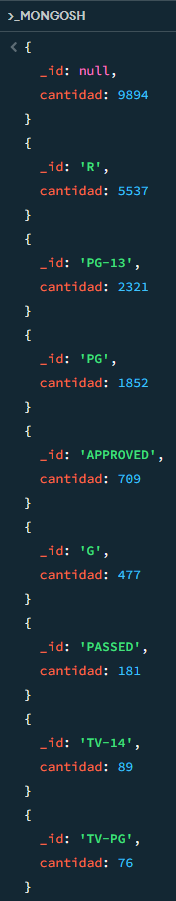
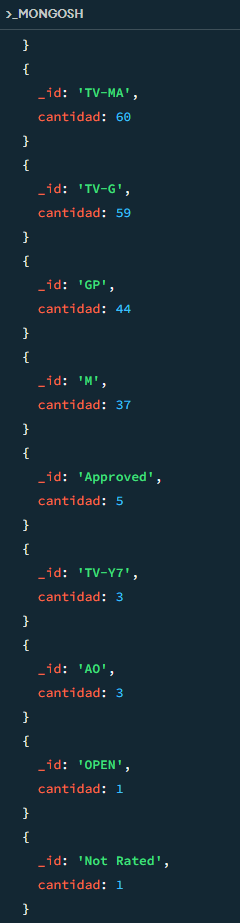

#### **6. Top 3 países productores de películas** 


``` javascript -- 
db.movies.aggregate([
  { $unwind: "$countries" },
  {
    $group: {
      _id: "$countries",
      total: { $sum: 1 }
    }
  },
  { $sort: { total: -1 } },
  { $limit: 3 }
]);
```

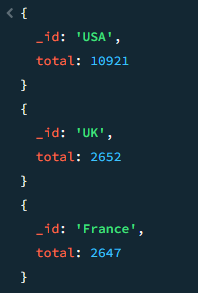

#### **7. Número promedio de miembros del reparto para películas después del 2000** 


``` javascript -- 
db.movies.aggregate([
  {
    $match: {
      year: { $gt: 2000 },
      cast: { $exists: true, $type: "array" }
    }
  },
  {
    $group: {
      _id: null,
      promedioReparto: { $avg: { $size: "$cast" } }
    }
  }
]);
```

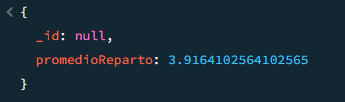

#### **8. Calificación promedio de IMDb y número de comentarios** 


``` javascript -- 
db.movies.aggregate([
  {
    $lookup: {
      from: "comments",
      localField: "_id",
      foreignField: "movie_id",
      as: "comentarios"
    }
  },
  {
    $project: {
      title: 1,
      imdb_rating: "$imdb.rating",
      cantidadComentarios: { $size: "$comentarios" }
    }
  }
]);
```

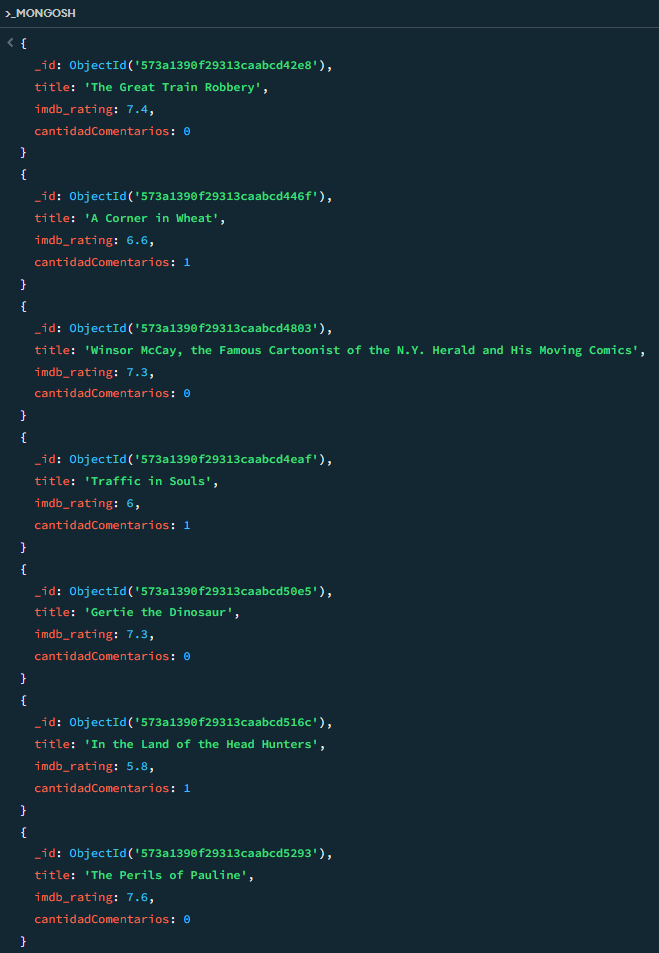 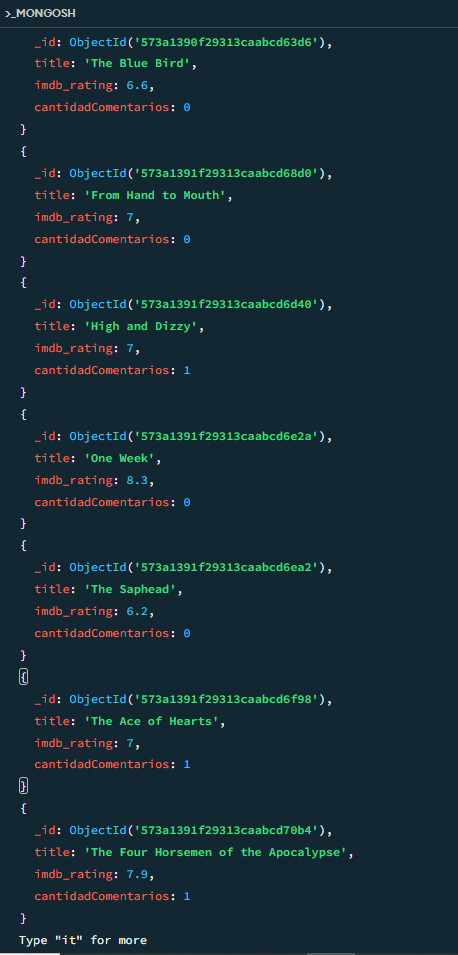

#### **9. Número total de películas comentadas por usuario** 


``` javascript -- 
db.comments.aggregate([
  {
    $group: {
      _id: "$email",
      totalPeliculasComentadas: { $sum: 1 }
    }
  },
  { $sort: { totalPeliculasComentadas: -1 } }
]);
```

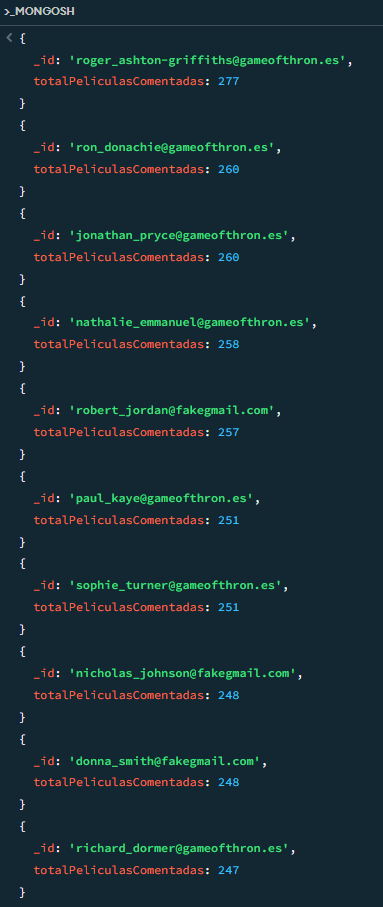 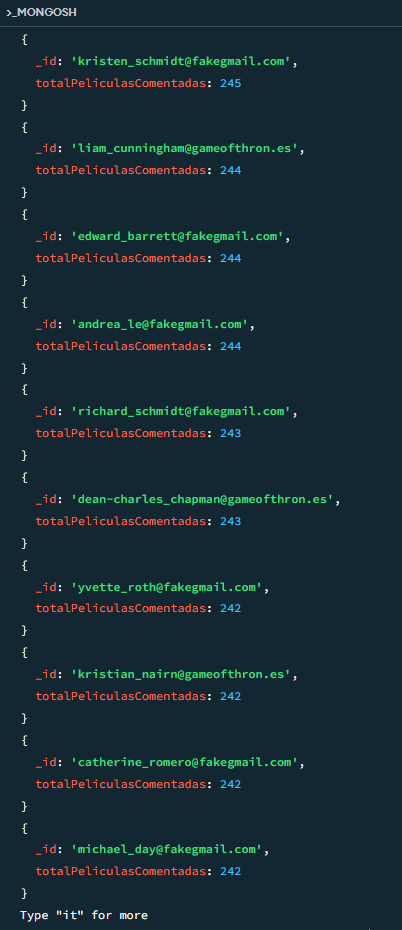

#### **10. Películas del género "Western" con comentarios previos a 2020** 


``` javascript -- 
db.movies.aggregate([
  { $match: { genres: "Western" } },
  {
    $lookup: {
      from: "comments",
      localField: "_id",
      foreignField: "movie_id",
      as: "comentarios"
    }
  },
  {
    $project: {
      title: 1,
      comentarios: {
        $filter: {
          input: "$comentarios",
          as: "comentario",
          cond: { $lt: ["$$comentario.date", ISODate("2020-01-01T00:00:00Z")] }
        }
      }
    }
  },
  { $match: { "comentarios.0": { $exists: true } } }
]);
```

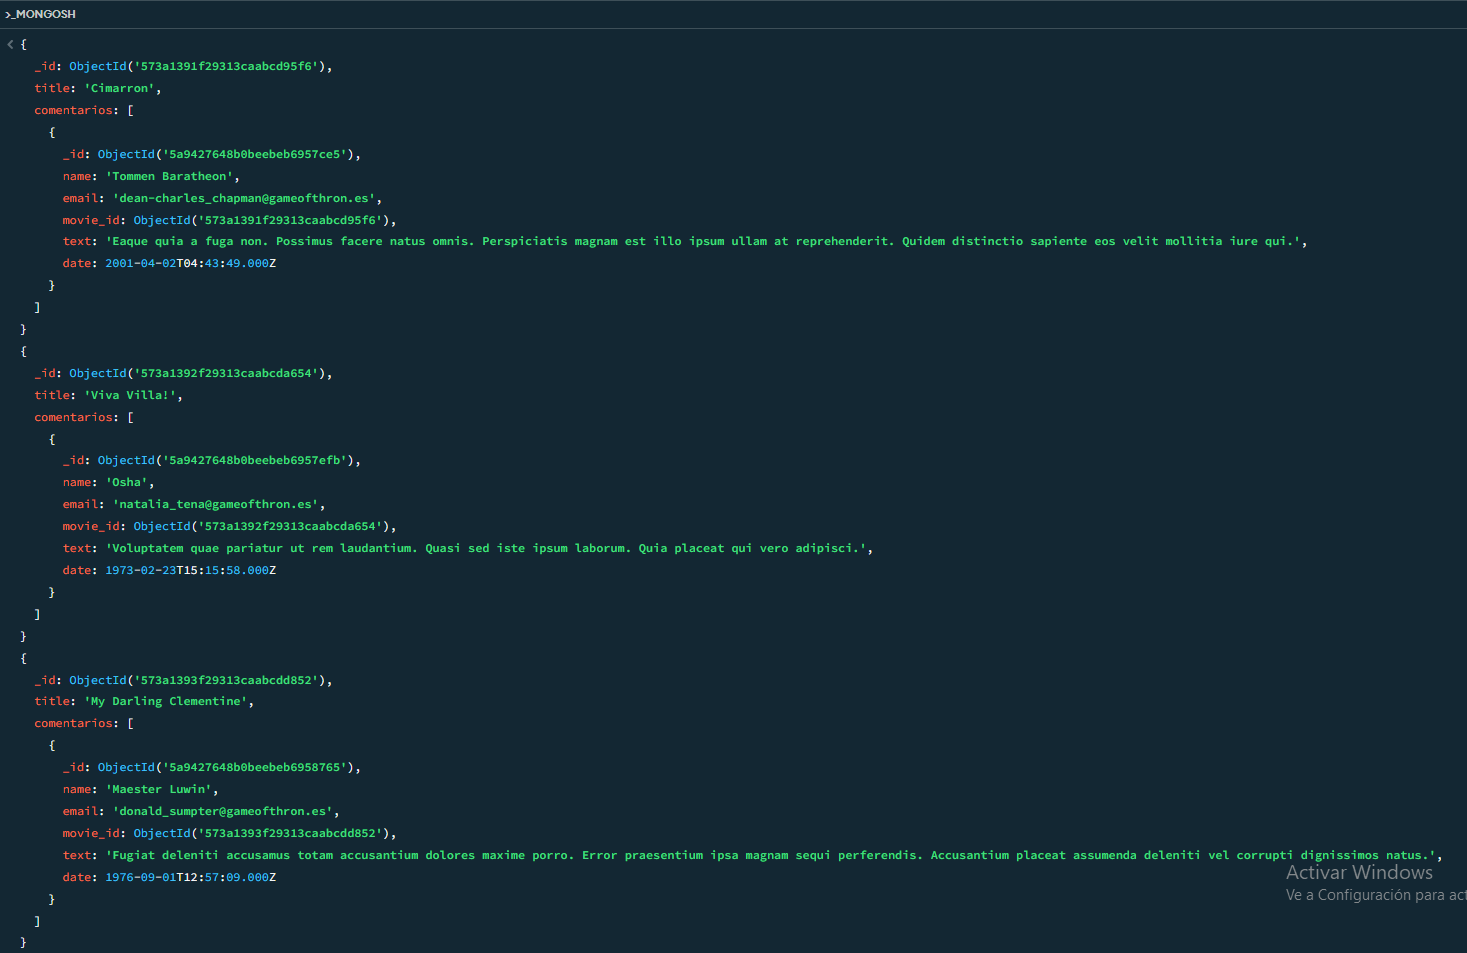
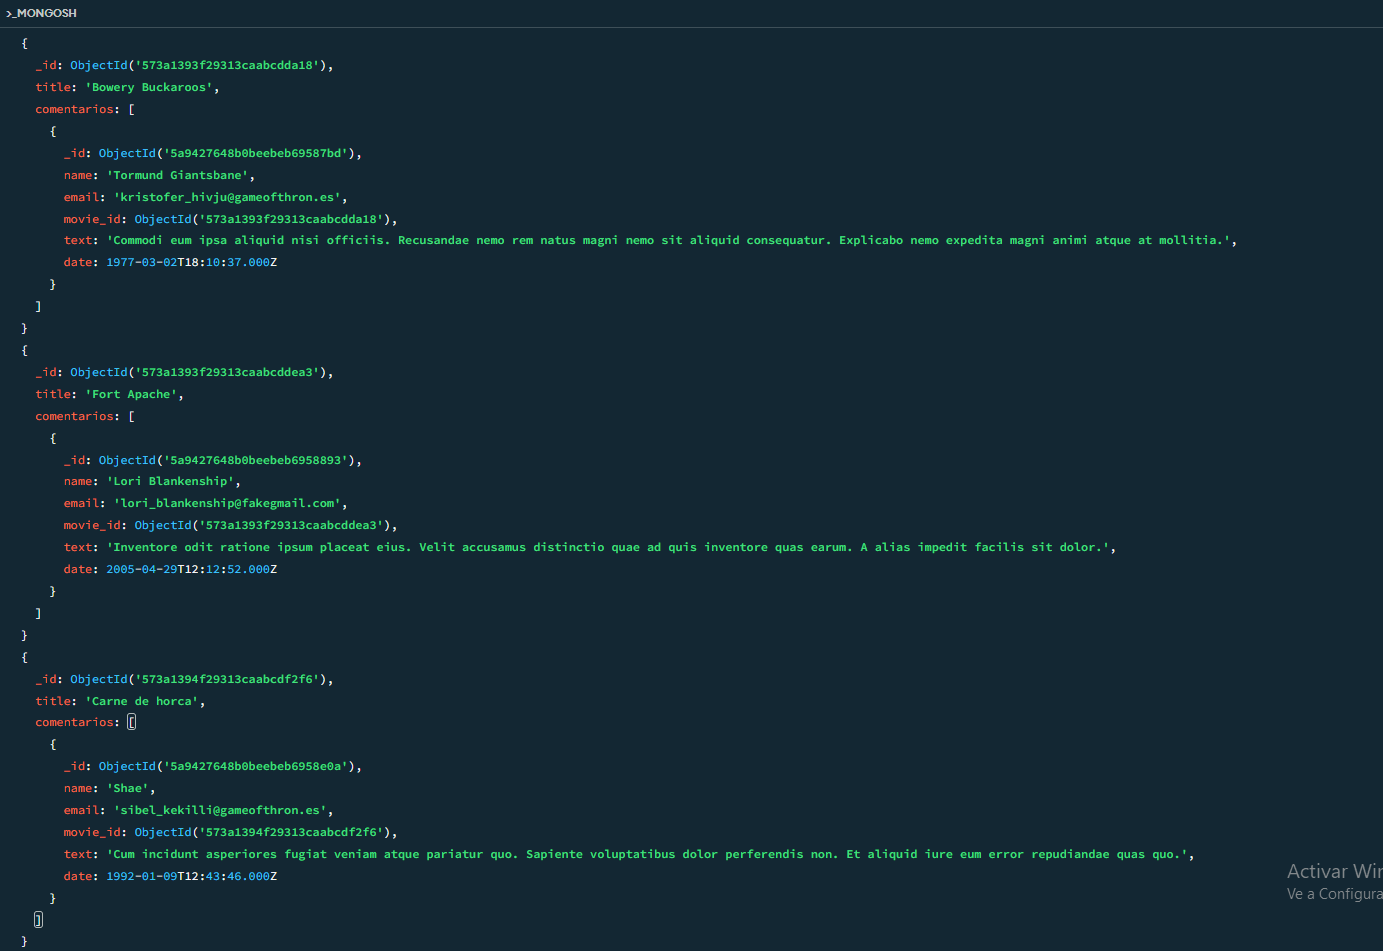